In [1]:
#import tensorflow_hub as hub
#import tensorflow_text
#import numpy as np
import pandas as pd
#from sentence_transformers import SentenceTransformer
#from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
date = pd.read_csv("date/reviews_mixed.csv",delimiter=",")

date_X = date[date.columns[0]].tolist()

date_Y = date[date.columns[1]].tolist()
date_Y = [1 if el=="positive" else 0 for el in date_Y]

date[:5]

,Text,Sentiment
0,"The rooms are extremely small, practically onl...",negative
1,Room safe did not work.,negative
2,Mattress very comfortable.,positive
3,"Very uncomfortable, thin mattress, with plasti...",negative
4,No bathroom in room,negative


In [3]:
#sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
#sbert_model = SentenceTransformer('all-mpnet-base-v2')
vectorizer = TfidfVectorizer()
#train_X_embeded = sbert_model.encode(date_X)
train_X = vectorizer.fit_transform(date_X)

Accuracy:  0.6859903381642513


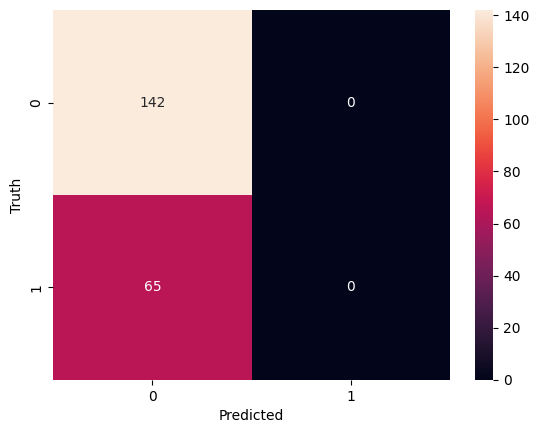

In [4]:
clustering = DBSCAN(eps=5,min_samples=3)
#clustering = DBSCAN()
arr = clustering.fit_predict(train_X)

print("Accuracy: ", accuracy_score(date_Y, clustering.labels_))

cm = confusion_matrix(date_Y, clustering.labels_)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [5]:
coords = train_X.toarray()
coords

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
cluster_labels = clustering.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)